In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [ ]:
#clone YOLOv5 and
#!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


/content/drive/MyDrive/Project/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
Setup complete. Using torch 2.2.1+cu121 (Tesla T4)


In [ ]:
!pip install -q roboflow

!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="lA5wQQnH1zdrShxamaGy")
project = rf.workspace("joel-kiprono-saat").project("my-proroject")
version = project.version(1)
dataset = version.download("yolov7")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-proroject-1 in yolov7pytorch:: 100%|██████████| 478/478 [00:05<00:00, 88.80it/s]


In [ ]:
%cd /content/drive/MyDrive/Project/yolov5
!python train.py --img 1024 --batch 16 --epochs 200 --data /content/drive/MyDrive/Project/My-proroject-1/data.yaml --weights yolov5s.pt --cache

/content/drive/MyDrive/Project/yolov5
2024-04-30 08:43:54.204092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 08:43:54.204144: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 08:43:54.205437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Project/My-proroject-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=

In [ ]:
# Run evaluation
!python detect.py --weights '/content/drive/MyDrive/Project/yolov5/runs/train/exp3/weights/best.pt' --conf 0.35 --source /content/drive/MyDrive/Project/My-proroject-1/test/images

detect: weights=['/content/drive/MyDrive/Project/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/Project/My-proroject-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/23 /content/drive/MyDrive/Project/My-proroject-1/test/images/Im010_1_jpg.rf.bc0f6d1ee73253e44f95cad10834aa45.jpg: 640x640 1 leukemia_cell, 11.5ms
image 2/23 /content/drive/MyDrive/Project/My-proroject-1/test/images/Im027_1_jpg.rf.397a503e318746

In [ ]:
!pip install Pillow

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the folder containing the images
folder_path = "/content/drive/MyDrive/Project/yolov5/runs/detect/exp6"

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display images
fig = plt.figure(figsize=(80, 80))
columns = 1
rows = len(image_files) // columns + 1
for i, file in enumerate(image_files):
    img = mpimg.imread(os.path.join(folder_path, file))
    ax = fig.add_subplot(rows, columns, i+1)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(file)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

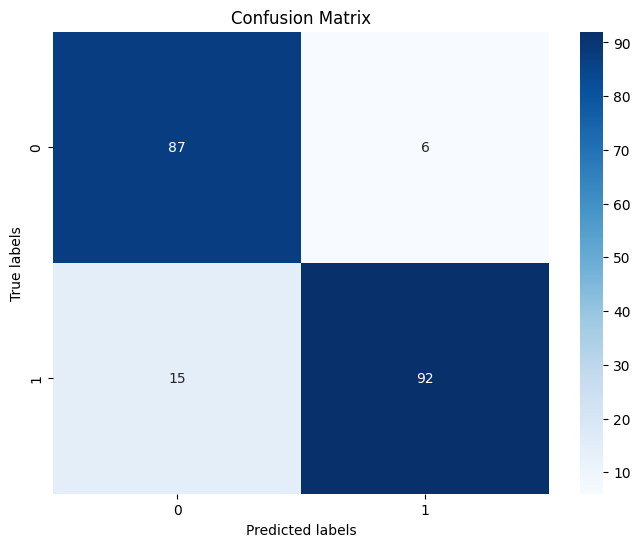

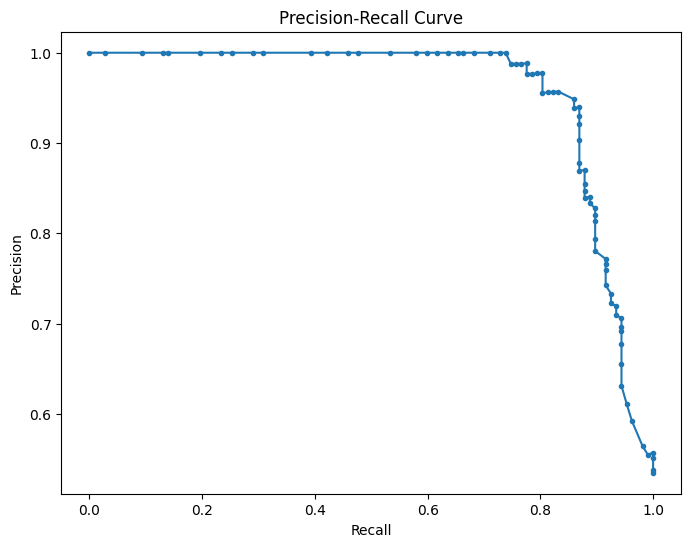

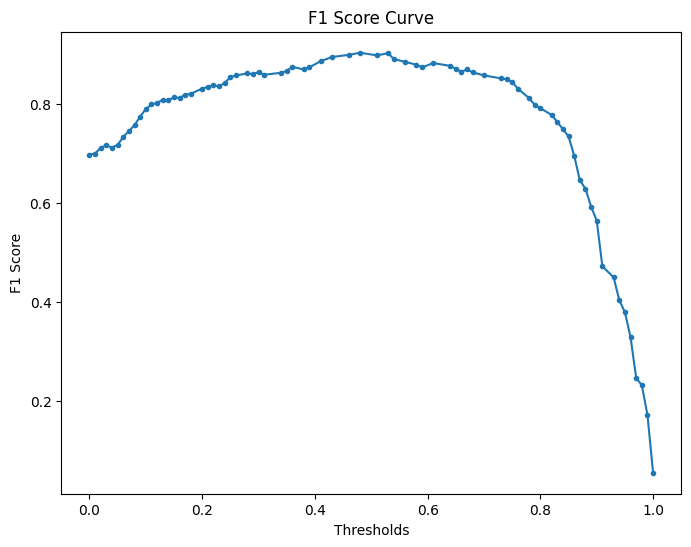

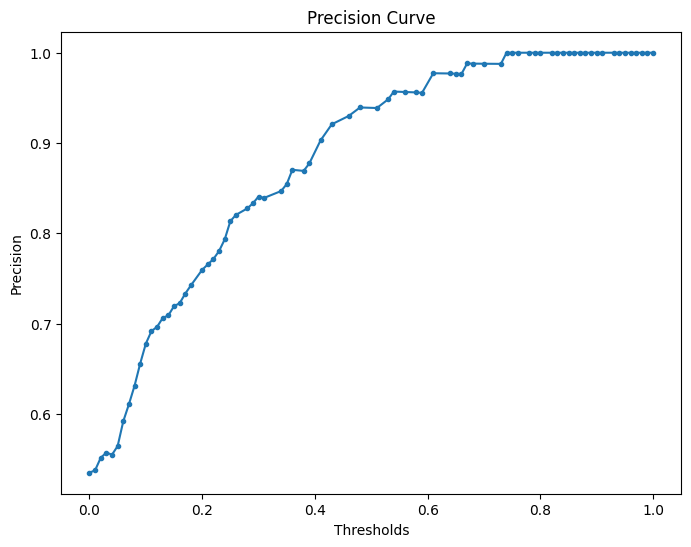

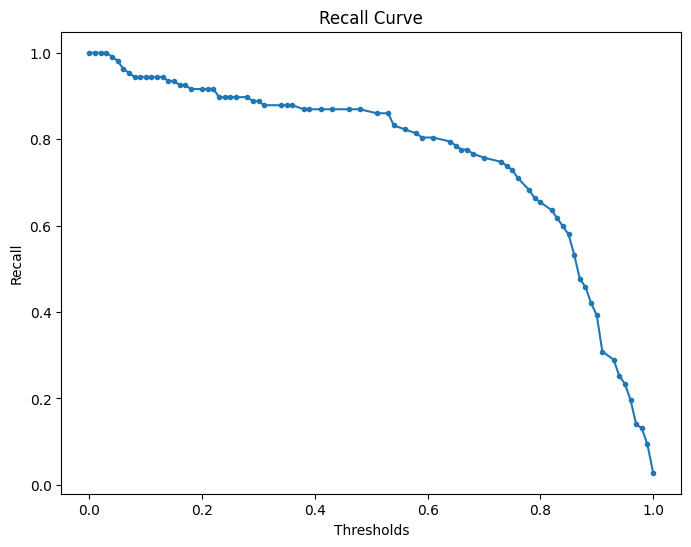

Accuracy Score: 0.895


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    f1_score,
    auc,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker=".")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.show()

# F1 Curve
def plot_f1_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    f1 = 2 * (precision * recall) / (precision + recall)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, f1[:-1], marker=".")
    plt.xlabel("Thresholds")
    plt.ylabel("F1 Score")
    plt.title("F1 Score Curve")
    plt.show()

# Precision Curve
def plot_precision_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision[:-1], marker=".")
    plt.xlabel("Thresholds")
    plt.ylabel("Precision")
    plt.title("Precision Curve")
    plt.show()

# Recall Curve
def plot_recall_curve(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, recall[:-1], marker=".")
    plt.xlabel("Thresholds")
    plt.ylabel("Recall")
    plt.title("Recall Curve")
    plt.show()

# Accuracy Score
def print_accuracy(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy Score: {acc}")

# Call functions
plot_confusion_matrix(y_test, y_pred)
plot_precision_recall_curve(y_test, y_scores)
plot_f1_curve(y_test, y_scores)
plot_precision_curve(y_test, y_scores)
plot_recall_curve(y_test, y_scores)
print_accuracy(y_test, y_pred)
